# Making of a image panel
Documenting an example of combining three different plot into one for report

In [ ]:
library(dplyr)
library(readr)
library(tibble)
library(ggplot2)
library(purrr)
library(tidyr)
library("ggpubr")

## Loading of data

In [6]:
plot19_dat = readRDS("~/Project/plot_19_pcnt.rds")
plot20_dat = readRDS("~/Project/plot_img20_overlap.rds")
Mengyu_plt_dat = readRDS("~/Project/plot_mengyu_result.rds")

## Plotting individual plot

In [17]:
level = c("FUSION","MvSuSiE")
theme = theme(axis.text.x = element_text(color = "grey20", size = 16, angle = 0, hjust = .5, vjust = .5, face = "plain"),
              axis.text.y = element_text(color = "grey20", size = 16, angle = 0, hjust = 1, vjust = 0, face = "plain"),  
              axis.title.x = element_text(color = "grey20", size = 20, angle = 0, hjust = .5, vjust = 0, face = "plain"),
              axis.title.y = element_text(color = "grey20", size = 20, angle = 90, hjust = .5, vjust = .5, face = "plain"),
              title = element_text(color = "grey20", size = 20, angle = 0, hjust = .5, vjust = 0, face = "plain"),
              legend.position="NONE",
              legend.title = element_blank(),
              panel.background = element_rect(fill = "white",
                                              colour = "black",
                                              size = 0.2, linetype = "solid"),
              text = element_text(size = 20)) 

In [16]:
plot_a = plot20_dat%>%ggplot(aes(x = Tissue, y = n,fill = Model  ))+geom_col(size=.1)+scale_fill_manual(values = c("#F9766D","79A4F8","#00BFC4"))+ylab("Number of genes")+#ggtitle("Number of significant TWAS")+
  theme_bw()+theme


plot_b = plot19_dat%>%mutate( winner = map_chr(pv_less,~level[.x+1] ) )%>%mutate(Tissue = factor(Tissue,levels = c("DLPFC","AC","PCC")))%>%
  group_by(Tissue,winner)%>%summarise(count = n() )%>%
  mutate(pcnt = count/sum(count),Winner = factor(winner, levels = c("MvSuSiE","FUSION") ) )%>%
  ggplot(aes(x = Tissue,y = pcnt,fill = Winner))+geom_col(size=.1)+ylab("Ratio")+labs(fill = "Winner")+scale_fill_manual(values = c("#F9766D","#00BFC4"))+#ggtitle("Ratio of genes with the better model")+
  theme_bw()+theme



plot_c = Mengyu_plt_dat %>%   
  ggplot(aes(x = Model, y = R2, fill=Betas)) +
  geom_bar(stat="identity",position = "dodge") +
  scale_fill_manual(values = c("grey", "#F9766D" ,"#00BFC4")) +
  theme_bw() +
  coord_cartesian(ylim = c(0.15, 0.3))+theme

`summarise()` has grouped output by 'Tissue'. You can override using the `.groups` argument.



## Combining the plots

In [20]:
plot_list = list(A = plot_a, B = plot_b, C = plot_c) 
plot = ggarrange(plotlist = plot_list, ncol = 3, widths = c(1.6,1.6,2) )

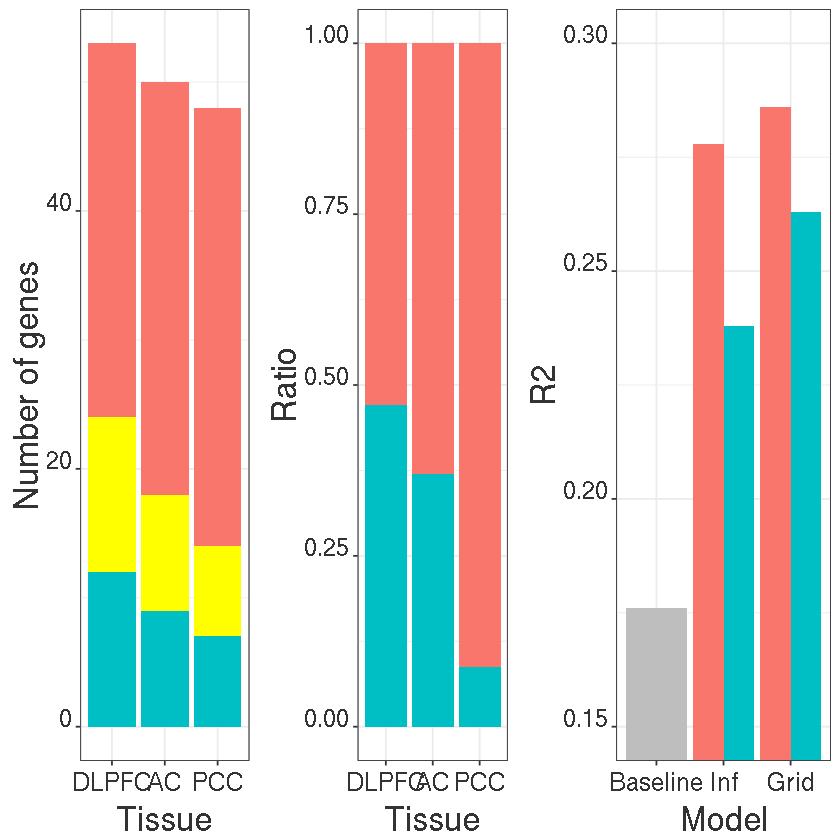

In [21]:
plot